In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats

In [2]:
# Read in file
cucco_file = "./cucco_madness.csv"

In [3]:
cucco_data = pd.read_csv(cucco_file)
cucco_df = pd.DataFrame(cucco_data)
cucco_df.columns = ["Seconds"]

In [4]:
cucco_df.describe()

,Seconds
count,290.000000
mean,116.720276
std,77.900896
min,2.610000
25%,55.632500
50%,110.755000
75%,156.242500
max,370.290000


129
124
25
12


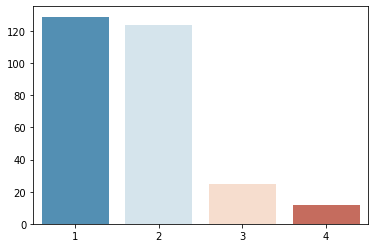

In [5]:
cucco_df["phase"] = ((cucco_df["Seconds"] / 100) + 1).astype(int)
phase, attempts = np.unique(cucco_df["phase"], return_counts=True)
for attempt in attempts:
    print(attempt)
sns.barplot(phase, attempts, palette="RdBu_r")

Slope: 0.09819238163888125
Intercept: 102.53147671525062

Attempts Left Until Next Phase: 3029
Attempts Left Total: 9139

Days Left Until Next Phase: 121
Days Left Total: 365


<function matplotlib.pyplot.show(*args, **kw)>

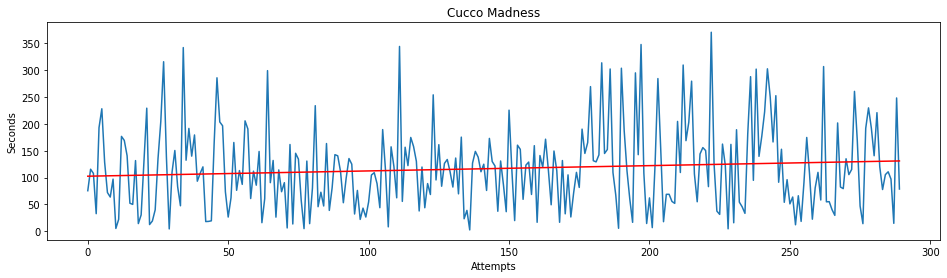

In [6]:
plt.figure(figsize=(16, 4))
plot = sns.lineplot(x=cucco_df.index, y=cucco_df["Seconds"], sort=False)

slope, intercept, r_value, p_value, std_err = stats.linregress(cucco_df.index.values,cucco_df["Seconds"].tolist())
x_vals = cucco_df.index.values
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color="red")

print("Slope: {}".format(slope))
print("Intercept: {}\n".format(intercept))
next_phase = int((400 - intercept)/(slope))
total_left = int((999.99 - intercept)/(slope))
print("Attempts Left Until Next Phase: {}".format(next_phase))
print("Attempts Left Total: {}\n".format(total_left))
print("Days Left Until Next Phase: {}".format(int(next_phase / 25)))
print("Days Left Total: {}".format(int(total_left / 25)))

#plt.ylim(0, 999.99)
plt.xlabel("Attempts")
y_label = "Seconds"
plt.ylabel(y_label)
plt.title("Cucco Madness")
plt.show